<a href="https://colab.research.google.com/github/performant23/customer-segmentation-k-m/blob/main/Model_Customer_Segmentation_with_K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source Credit - https://www.kaggle.com/datasets/somesh24/customer-segmentation

In this notebook, we aim to segment customers using k-means clustering algorithm which finds centroids of clusters and based on proximity of data points, determines optimal number of clusters. The dataset is taken from Kaggle. We use the elbow method to determine optimal number of clusters and use metric scores like silhouette scores to determine the performance of the algorithm. We will also use Expectation-maximization (EM) algorithm to cluster the data and compare the accuracy score (silhouette score) with k-means.

In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Obtaining data as a pandas dataframe
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cust_Segmentation.csv')
data


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


Now, we can get started with preprocessing the data. We can drop the columns, Customer Id and Address because they seem to give little information about the type of customers (There are too many values of address, that could potentially overfit the data)

In [ ]:
# Dropping irrelevant columns
data = data.drop(['Address', 'Customer Id'], axis = 1)

# Deleting entries with invalid values
data = data.dropna()
data

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
844,41,1,7,43,0.694,1.198,0.0,4.4
846,28,2,7,34,0.359,2.021,0.0,7.0
847,25,4,0,18,2.802,3.210,1.0,33.4
848,32,1,12,28,0.116,0.696,0.0,2.9


In [ ]:
X = data
#Checking for missing, negative, or invalid values
missing_values = X.isnull().sum()
zero_values = (X == 0).sum()
negative_values = (X < 0).sum()
invalid_values = pd.concat([missing_values, zero_values, negative_values], axis=1)
invalid_values.columns = ['Missing Values', 'Zero Values', 'Negative Values']
print(invalid_values)

                 Missing Values  Zero Values  Negative Values
Age                           0            0                0
Edu                           0            0                0
Years Employed                0           62                0
Income                        0            0                0
Card Debt                     0            0                0
Other Debt                    0            0                0
Defaulted                     0          517                0
DebtIncomeRatio               0            0                0


In [ ]:
# Preprocessing the data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

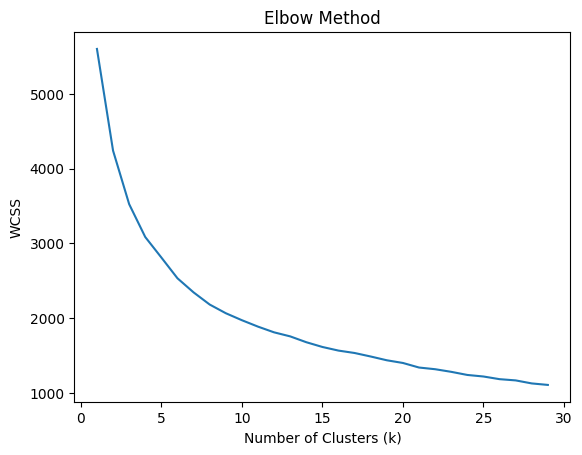

In [ ]:
#Implementing Elbow method to find optimal clusters
wcss = []

for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 30), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


The slope seems to be going steep on some value betweeen 1-5. We can check for exact values by iterating for the appropriate range

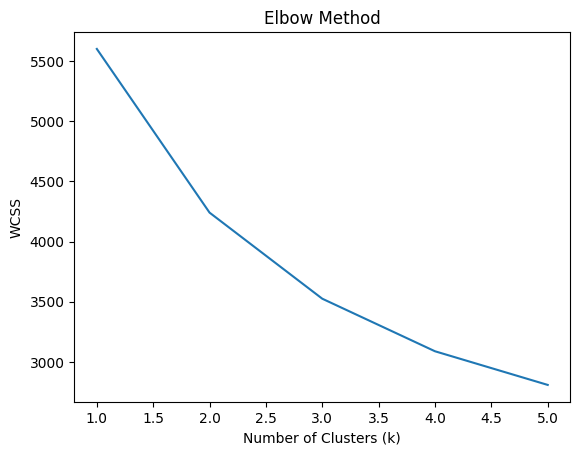

In [ ]:
wcss = []

for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 6), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


We can keep 2 clusters as relatively optimal

In [ ]:
# Obtaining the ideal number of clusters using silhoutte scores as an alternative.

silhouette_scores = []

k_values = range(2,31)

for k in range(2,31):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)

    labels = kmeans.labels_

    sse = kmeans.inertia_

    silhouette_avg = silhouette_score(X_scaled, labels)

    silhouette_scores.append(silhouette_avg)

    print("Silhouette Score for k =", k, ":", silhouette_avg)
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 2 : 0.33496643365707623

Silhouette Score for k = 3 : 0.27163714546797385

Silhouette Score for k = 4 : 0.2483377629854806

Silhouette Score for k = 5 : 0.23165283294737468

Silhouette Score for k = 6 : 0.23818469391126096



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 7 : 0.21813115830590124

Silhouette Score for k = 8 : 0.22896676497053428



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 9 : 0.21008972038558305

Silhouette Score for k = 10 : 0.19420647416896547



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 11 : 0.20187557594760602

Silhouette Score for k = 12 : 0.20149820853913492



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 13 : 0.19644288307887775

Silhouette Score for k = 14 : 0.20275366172650405



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 15 : 0.19348883817745544

Silhouette Score for k = 16 : 0.19483268704139192



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 17 : 0.1942640377206834

Silhouette Score for k = 18 : 0.19097553456258



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 19 : 0.1916525142618968

Silhouette Score for k = 20 : 0.19222069353335267



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 21 : 0.17854600371111215

Silhouette Score for k = 22 : 0.19715384450352572



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 23 : 0.1885312468267092

Silhouette Score for k = 24 : 0.17616846222569962



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 25 : 0.18393198046868645



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 26 : 0.19535598443289287

Silhouette Score for k =

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


 27 : 0.19300145931575302



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 28 : 0.18993802259362788

Silhouette Score for k = 29 : 0.1860260044219523



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 30 : 0.18745272430183615



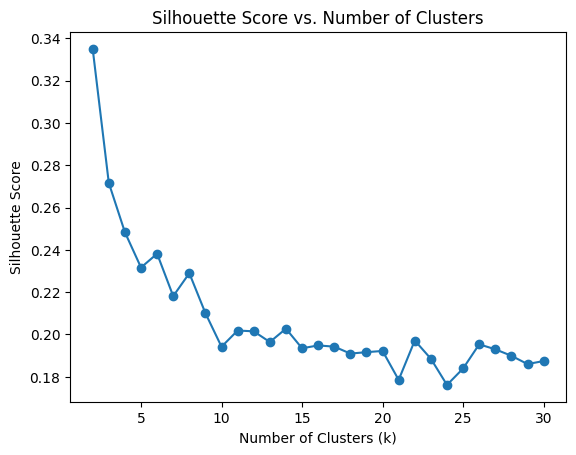

In [ ]:
# Plotting the Silhouette Scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.show()


In [ ]:
# Again we got optimal clusters as 2, and so we can apply k-means to 2 clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)
labels = kmeans.labels_
silhouette_avg = silhouette_score(X_scaled, labels)
print("Labels: ", labels)
print("Silhouette Score: ", silhouette_avg)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Labels:  [1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0
 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0
 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1
 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1
 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0
 1 1 1 0 0 1 1 1

So, we can conclude that for our reasonable range of 2-30 inclusive, the optimal number of clusters is 2 and we can divide the customers in the dataset into 2 clusters. We can see that while the metrics are relatively optimal, they aren't globally optimal. For example, our silhouette score is low as compared to generally optimal scores of approximately 1. This can happen due to multiple reasons mostly being:
1. Overlapping or poorly separated clusters: If the clusters in the data are overlapping or not well separated, it becomes challenging for the silhouette coefficient to assign data points to the correct clusters. This can result in lower silhouette scores among other metrics.
2. If the cluster sizes are imbalanced, the seperation scores becomes low leading to poor performance of the algorithm.
3. If the data is noisy, clusters can be hard to seperate leading to impure clusters. That is, having significant data points of other clusters in a cluster. That can potentially lead to poor clustering leading to a poor performance

We can use the Expectation–maximization algorithm (EM Algorithm) to cluster the dataset. The algorithm is shown to have good results for overlapping datasets and datasets with unequal cluster sizes.

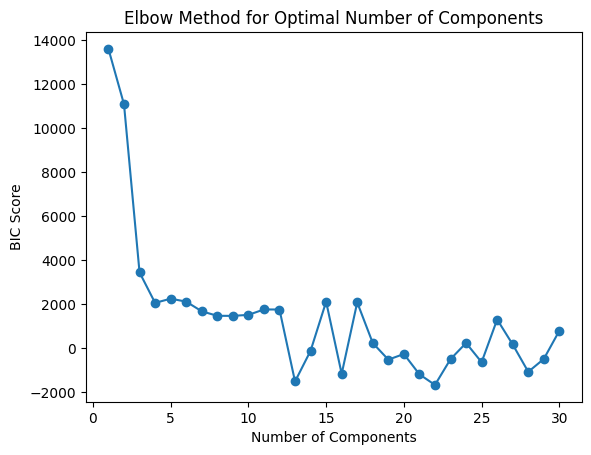

In [ ]:
bic_scores = []

num_components_range = range(1, 31)

for n_components in num_components_range:
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(X_scaled)

    bic_scores.append(gmm.bic(X_scaled))

# Plotting the BIC scores
plt.plot(num_components_range, bic_scores, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("BIC Score")
plt.title("Elbow Method for Optimal Number of Components")
plt.show()


Again, the optimal number of clusters seems to be 2. So, we can apply the algorithm for 2 clusters.

In [ ]:
gmm = GaussianMixture(n_components=2)

gmm.fit(X_scaled)

labels = gmm.predict(X_scaled)

cluster_centers = gmm.means_

cluster_covariances = gmm.covariances_

silhouette_avg = silhouette_score(X, labels)
print("Labels:", labels)
print("Cluster Centers:", cluster_centers)
print("Cluster Covariances: ", cluster_covariances)
print("Silhouette Score:", silhouette_avg)

Labels: [0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1
 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1
 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0
 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1
 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0
 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1
 1 0 0 1 1 1 0 1 

As we can see, we got better silhouette score for EM algorithm as opposed to k-means algorithm relatively and also, the performance in general is also decent with EM algorithm. This indicates that the EM algorithm's probability-based clustering approach, which models the underlying data distribution, is more suitable for our dataset than the distance-based clustering approach of k-means. This can be due to the reasons we mentioned above i.e. overlapping clusters, noisy data, and unequal cluster sizes.